In [1]:
#Define imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load the dataset
file_path = 'alzheimers_disease_data.csv'
data = pd.read_csv(file_path)

In [3]:
# Print out dataset data
print("Shape of the dataset:", data.shape)
print("\n \n \n")
print(" Missing values: ", data.isnull().sum())
print("\n \n \n")
print("Data types: ", data.dtypes)

Shape of the dataset: (2149, 35)

 
 

 Missing values:  PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityCh

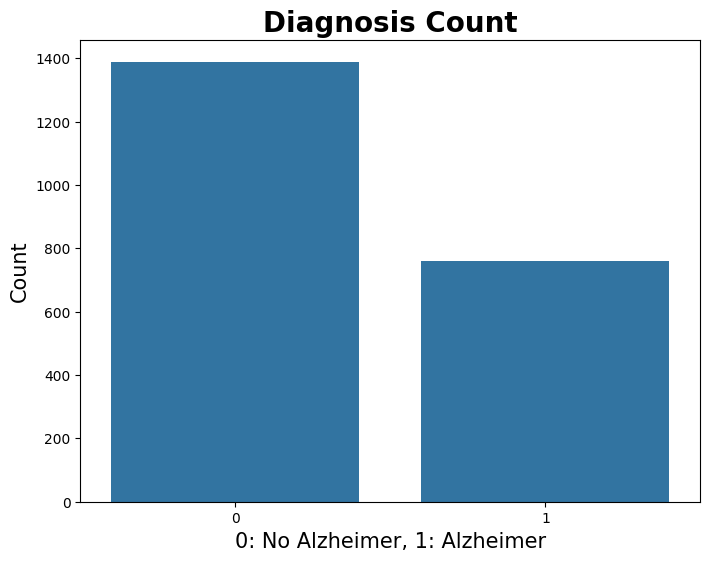

In [4]:
#Create a bar graph to show number of diagnosis for patients
plt.figure(figsize=(8, 6))
sns.countplot(x='Diagnosis', data=data)

#Add labels and show graph
plt.title('Diagnosis Count', fontsize=20, fontweight='bold')
plt.xlabel('0: No Alzheimer, 1: Alzheimer', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

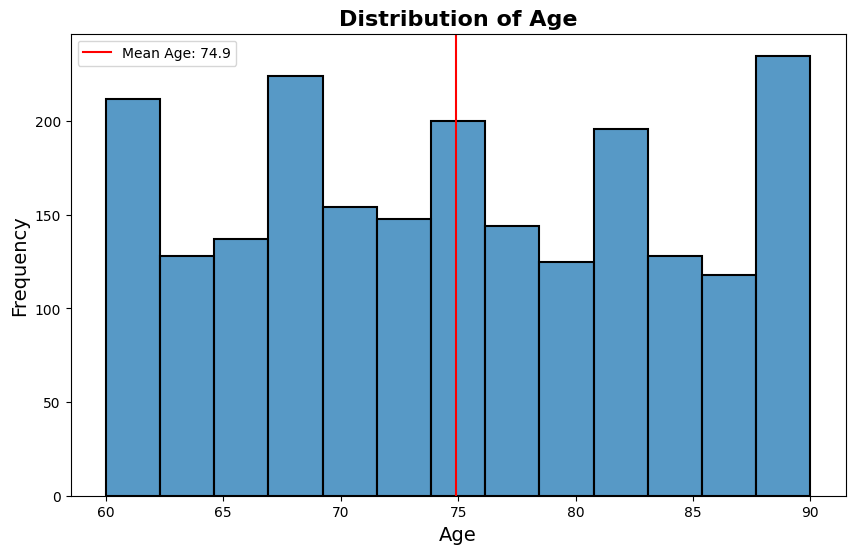

In [5]:
# Create a histogram to show age distribution
plt.figure(figsize=(10, 6)) 
sns.histplot(data['Age'], edgecolor='black', linewidth=1.5)

# Add labels and title to data
plt.title('Distribution of Age', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

#Calculate mean age of patients
mean_age = data['Age'].mean()
plt.axvline(mean_age, color='red', label=f'Mean Age: {mean_age:.1f}')

# Add a legend for the mean age line
plt.legend()

# Display the plot
plt.grid(False)
plt.show()

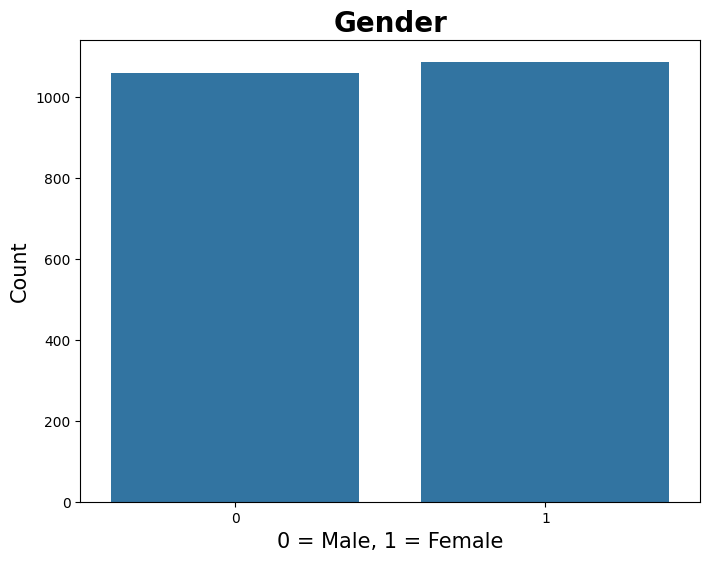

In [6]:
#Create a bar graph to show gender breakdown of patients
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data)

#Add labels and show graph
plt.title('Gender', fontsize=20, fontweight='bold')
plt.xlabel('0 = Male, 1 = Female', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.grid(False)
plt.show()

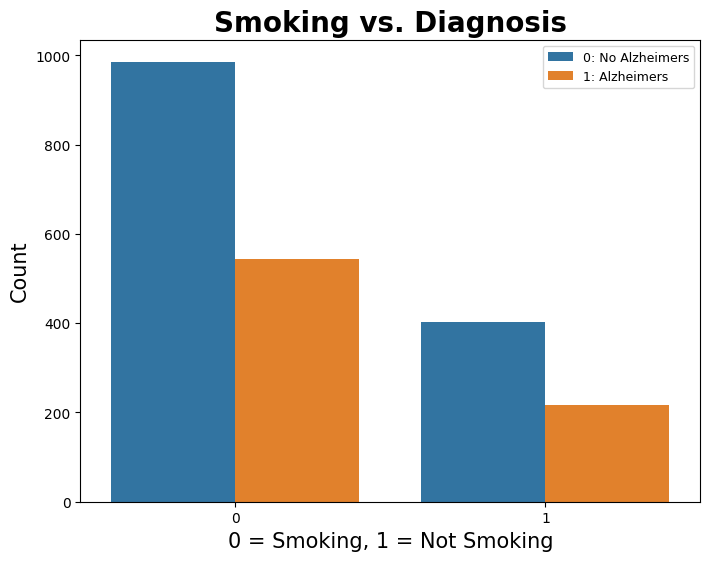

In [7]:
#Create a plot that shows people who smoke and who are diagnosed
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Smoking', hue='Diagnosis')
plt.title('Smoking vs. Diagnosis',  fontsize=20, fontweight='bold')
plt.xlabel('0 = Smoking, 1 = Not Smoking', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.legend(['0: No Alzheimers', '1: Alzheimers'], fontsize=9) 
plt.grid(False)
plt.show()

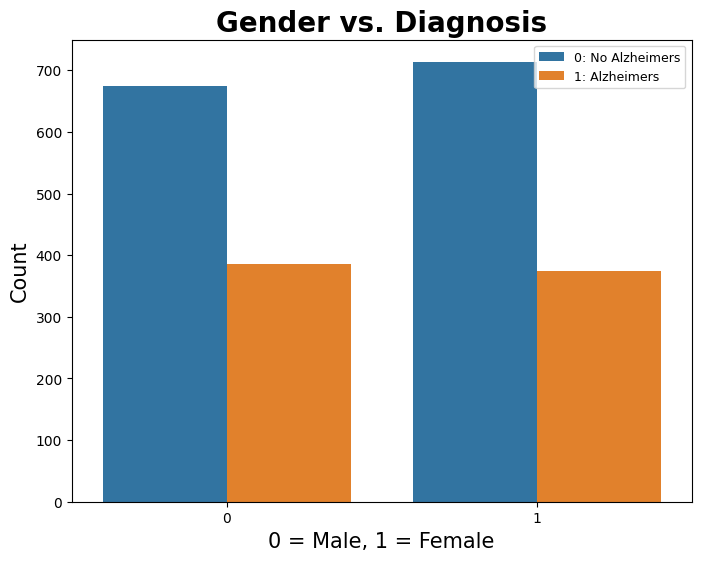

In [8]:
#Create a plot that shows gender and who are diagnosed
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Gender', hue='Diagnosis')
plt.title('Gender vs. Diagnosis',  fontsize=20, fontweight='bold')
plt.xlabel('0 = Male, 1 = Female', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.legend(['0: No Alzheimers', '1: Alzheimers'], fontsize=9) 
plt.grid(False)
plt.show()

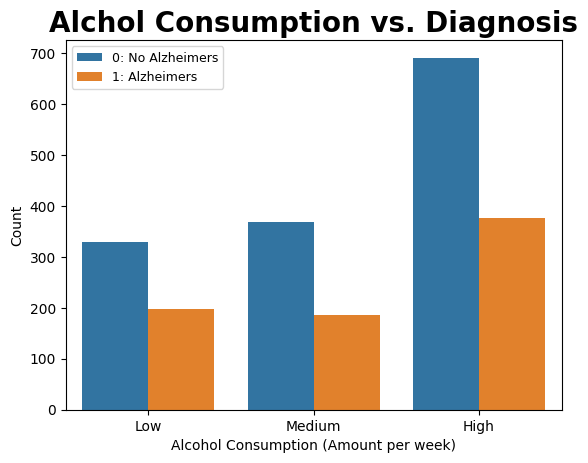

In [9]:
#Create a plot that shows alcohol and who are diagnosed
data['AlcoholConsumptionNew'] = pd.cut(data['AlcoholConsumption'], bins=[0, 5, 10, 20], labels=['Low', 'Medium', 'High'])
sns.countplot(data=data, x='AlcoholConsumptionNew', hue='Diagnosis')
plt.title('Alchol Consumption vs. Diagnosis',  fontsize=20, fontweight='bold')
plt.xlabel('Alcohol Consumption (Amount per week)')
plt.ylabel('Count')
plt.legend(['0: No Alzheimers', '1: Alzheimers'], fontsize=9)
plt.grid(False)
plt.show()

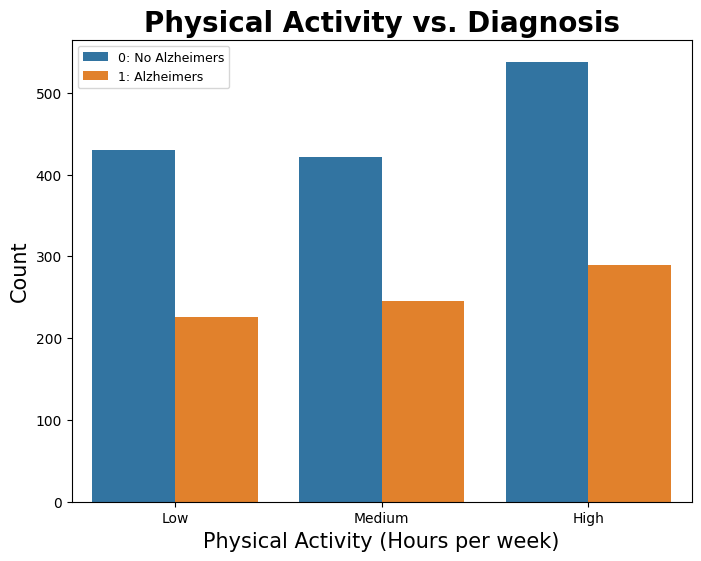

In [10]:
#Create a plot that shows levels physical activity and who are diagnosed
data['PhysicalActivityNew'] = pd.cut(data['PhysicalActivity'], bins=[0, 3, 6, 10], labels=['Low', 'Medium', 'High'])
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='PhysicalActivityNew', hue='Diagnosis')
plt.title('Physical Activity vs. Diagnosis', fontsize=20, fontweight='bold')
plt.xlabel('Physical Activity (Hours per week)', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.legend(['0: No Alzheimers', '1: Alzheimers'], fontsize=9) 
plt.grid(False)
plt.show()

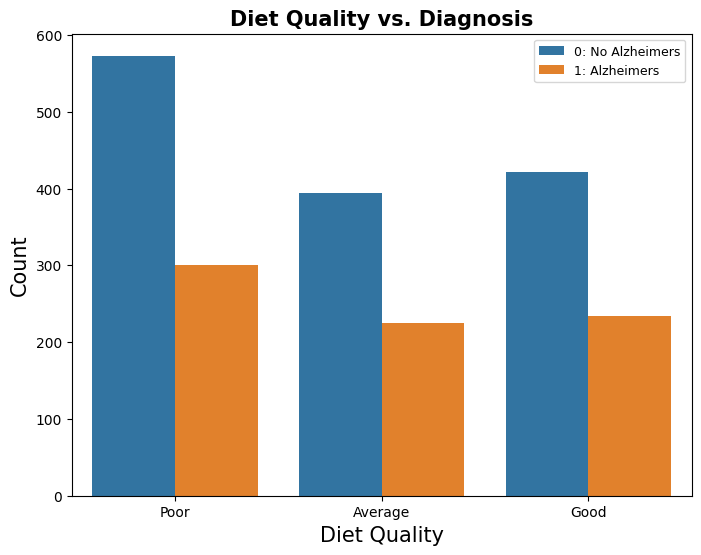

In [11]:
#Create a plot that shows diet quality and who are diagnosed
data['DietQualityNew'] = pd.cut(data['DietQuality'], bins=[0, 4, 7, 10], labels=['Poor', 'Average', 'Good'])
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='DietQualityNew', hue='Diagnosis')
plt.title('Diet Quality vs. Diagnosis', fontsize=15, fontweight='bold')
plt.xlabel('Diet Quality', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.legend(['0: No Alzheimers', '1: Alzheimers'], fontsize=9) 
plt.grid(False)
plt.show()

In [17]:
#Show a correlation matrix to see which features are highly correlated
plt.figure(figsize=(20, 20))
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
numerical_data = data[numerical_columns]
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'XXXConfid'

<Figure size 2000x2000 with 0 Axes>

In [ ]:
#Preprocess Data:

#Check for missing values
print("Missing values:", data.isnull().sum())

In [13]:
# Select numerical columns to scale
numerical_cols = ['Age', 'BMI', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 
                  'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']

# Apply LabelEncoder
categorical_cols = ['AlcoholConsumptionNew', 'PhysicalActivityNew', 'DietQualityNew', 'Ethnicity', 'EducationLevel']
encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

# Scale the numerical columns
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [14]:
#Define target variable and features
X = data.drop(columns=['Diagnosis', 'PatientID', 'DoctorInCharge'])
y = data['Diagnosis']

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
#Logistic Regression Model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.8255813953488372
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       277
           1       0.78      0.71      0.74       153

    accuracy                           0.83       430
   macro avg       0.81      0.80      0.81       430
weighted avg       0.82      0.83      0.82       430



Random Forest Accuracy: 0.9209302325581395
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       277
           1       0.96      0.81      0.88       153

    accuracy                           0.92       430
   macro avg       0.93      0.90      0.91       430
weighted avg       0.92      0.92      0.92       430



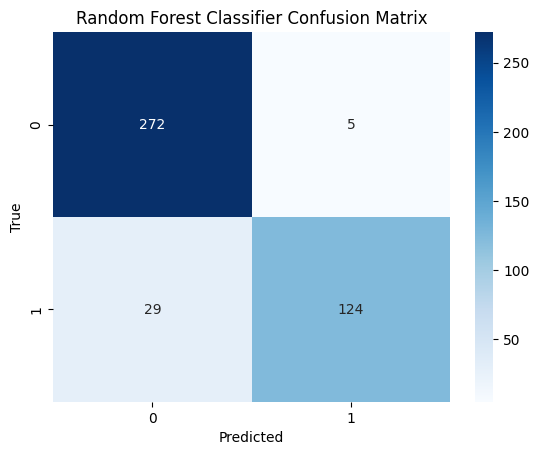

In [16]:
#Random Forest Classifier Model
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

#Confusion Matrix for Random Forest
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()